In [1]:
import pandas
import warnings

from operator import eq
from cartoframes.viz import Layer

warnings.filterwarnings('ignore')
warnings.simplefilter  ('ignore')

pandas.set_option('display.max_rows',     500)
pandas.set_option('display.max_columns',  500)
pandas.set_option('display.width',       1000)
pandas.set_option('display.max_colwidth', 100)

from gistools.utils import read_csv, reformat_date, to_pickle, read_pickle, drop_duplicates
from gistools.gmapsro import FleetRouting, FleetRoutingEntity

In [2]:
shipments = pandas.read_csv('_dataset/shipments.csv', sep=',')

print('{}'.format(len(shipments)))
shipments.head()

110318


,id,name,external_id,input_address,input_postal_code,input_city,location_code,no_items,no_items_primary,no_items_second,no_references,weight_kg,pickup_location_id,store_pickup,setup,encasement,smart_tv,product_category_id,product_category_id_primary,product_category_name,depot_id,depot_short_name,depot_name,time_slot,duration,duration_text,duration_bin,duration_bin_text,initial_route_id,initial_route_short_name,initial_route_name,initial_route_external_id,initial_route_date,initial_route_datetime,year,month,day,weekday,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,initial_delay,initial_delay_text,customer_service,visit_type,visit_requirements,period,time_window_start,soft_time_window_start,time_window_end,soft_time_window_end,cost_per_hour_before_soft_start_time,cost_per_hour_after_soft_end_time,formatted_address,place_id,plus_code,address,postal_code,city,location_type,confidence,maps_URL,longitude,latitude,geometry
0,112980,112980,8122527,8 RUE DU PETIT LANGUEDOC,12000,RODEZ,58,1,1,0,1,61000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:31:32,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:31:32,1,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,01/03/2023,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"8 Rue du Petit Languedoc, 12000 Rodez, France",ChIJwVB6nKR9shIR3fPy0bL8Qhc,8FP48HWC+JC,8 Rue du Petit Languedoc,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.346545%2C2.571018&query_place_id=ChIJwVB6nKR9...,2.571018,44.346545,POINT (2.571018 44.346545)
1,112984,112984,8127310,2 RUE DU TOUAT,12000,RODEZ,58,1,1,0,1,53000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:55:03,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:55:03,2,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,01/03/2023,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"2 Rue du Touat, 12000 Rodez, France",ChIJU_3vkKF9shIRRNERsZs1bAw,8FP48HXG+V3,2 Rue du Touat,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.349676%2C2.575138&query_place_id=ChIJU_3vkKF9...,2.575138,44.349676,POINT (2.575138 44.349676)
2,112981,112981,8125538,1 RUE DU TOPAZE,12510,DRUELLE,58,1,1,0,1,61000,916058,False,O,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 10:21:02,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,10:21:02,3,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,duo,duo,01/03/2023,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"1 Rue des Topazes, 12510 Druelle Balsac, France",ChIJ0x0Wkh9-shIR5aOoH1WQIvA,8FP49GCC+36,1 Rue des Topazes,12510,Druelle Balsac,ROOFTOP,0.98,https://www.google.com/maps/search/?api=1&query=44.370146%2C2.520509&query_place_id=ChIJ0x0Wkh9-...,2.520509,44.370146,POINT (2.520509 44.370146)
3,112982,112982,8125673,119 AV DE RODEZ,12160,BARAQUEVILLE,58,1,1,0,1,62000,916058,False,O,N,N,CUE,['CUE'],CUISINIERE ELECTRIQ.,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 11:05:49,2023,3,1,3,NaN,Duo,duo,9:03:01,2023-03-01 09:03:01,11:05:49,4,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,duo,duo,01/03/2023,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"119 Av. de Rodez, 12160 Baraqueville, France",ChIJGU2pphWHrRIRbDsjYb7JcQY,8FP47CGQ+W5,119 Avenue de Rodez,12160

In [3]:
shipments = reformat_date(shipments, column='period')

shipments = shipments.rename(columns={'external_id': 'shipment_id', 'name': 'shipment_name'})

print('{}'.format(len(shipments)))
shipments.head()

110318


,id,shipment_name,shipment_id,input_address,input_postal_code,input_city,location_code,no_items,no_items_primary,no_items_second,no_references,weight_kg,pickup_location_id,store_pickup,setup,encasement,smart_tv,product_category_id,product_category_id_primary,product_category_name,depot_id,depot_short_name,depot_name,time_slot,duration,duration_text,duration_bin,duration_bin_text,initial_route_id,initial_route_short_name,initial_route_name,initial_route_external_id,initial_route_date,initial_route_datetime,year,month,day,weekday,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,initial_delay,initial_delay_text,customer_service,visit_type,visit_requirements,period,time_window_start,soft_time_window_start,time_window_end,soft_time_window_end,cost_per_hour_before_soft_start_time,cost_per_hour_after_soft_end_time,formatted_address,place_id,plus_code,address,postal_code,city,location_type,confidence,maps_URL,longitude,latitude,geometry
0,112980,112980,8122527,8 RUE DU PETIT LANGUEDOC,12000,RODEZ,58,1,1,0,1,61000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:31:32,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:31:32,1,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"8 Rue du Petit Languedoc, 12000 Rodez, France",ChIJwVB6nKR9shIR3fPy0bL8Qhc,8FP48HWC+JC,8 Rue du Petit Languedoc,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.346545%2C2.571018&query_place_id=ChIJwVB6nKR9...,2.571018,44.346545,POINT (2.571018 44.346545)
1,112984,112984,8127310,2 RUE DU TOUAT,12000,RODEZ,58,1,1,0,1,53000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:55:03,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:55:03,2,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"2 Rue du Touat, 12000 Rodez, France",ChIJU_3vkKF9shIRRNERsZs1bAw,8FP48HXG+V3,2 Rue du Touat,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.349676%2C2.575138&query_place_id=ChIJU_3vkKF9...,2.575138,44.349676,POINT (2.575138 44.349676)
2,112981,112981,8125538,1 RUE DU TOPAZE,12510,DRUELLE,58,1,1,0,1,61000,916058,False,O,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 10:21:02,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,10:21:02,3,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"1 Rue des Topazes, 12510 Druelle Balsac, France",ChIJ0x0Wkh9-shIR5aOoH1WQIvA,8FP49GCC+36,1 Rue des Topazes,12510,Druelle Balsac,ROOFTOP,0.98,https://www.google.com/maps/search/?api=1&query=44.370146%2C2.520509&query_place_id=ChIJ0x0Wkh9-...,2.520509,44.370146,POINT (2.520509 44.370146)
3,112982,112982,8125673,119 AV DE RODEZ,12160,BARAQUEVILLE,58,1,1,0,1,62000,916058,False,O,N,N,CUE,['CUE'],CUISINIERE ELECTRIQ.,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 11:05:49,2023,3,1,3,NaN,Duo,duo,9:03:01,2023-03-01 09:03:01,11:05:49,4,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"119 Av. de Rodez, 12160 Baraqueville, France",ChIJGU2pphWHrRIRbDsjYb7JcQY,8FP47CGQ+W5,119 Avenue de Ro

In [4]:
shipments = FleetRoutingEntity(shipments)

print('{}'.format(len(shipments)))
shipments.head()

110318


,id,shipment_name,shipment_id,input_address,input_postal_code,input_city,location_code,no_items,no_items_primary,no_items_second,no_references,weight_kg,pickup_location_id,store_pickup,setup,encasement,smart_tv,product_category_id,product_category_id_primary,product_category_name,depot_id,depot_short_name,depot_name,time_slot,duration,duration_text,duration_bin,duration_bin_text,initial_route_id,initial_route_short_name,initial_route_name,initial_route_external_id,initial_route_date,initial_route_datetime,year,month,day,weekday,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,initial_delay,initial_delay_text,customer_service,visit_type,visit_requirements,period,time_window_start,soft_time_window_start,time_window_end,soft_time_window_end,cost_per_hour_before_soft_start_time,cost_per_hour_after_soft_end_time,formatted_address,place_id,plus_code,address,postal_code,city,location_type,confidence,maps_URL,longitude,latitude,geometry
0,112980,112980,8122527,8 RUE DU PETIT LANGUEDOC,12000,RODEZ,58,1,1,0,1,61000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:31:32,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:31:32,1,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"8 Rue du Petit Languedoc, 12000 Rodez, France",ChIJwVB6nKR9shIR3fPy0bL8Qhc,8FP48HWC+JC,8 Rue du Petit Languedoc,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.346545%2C2.571018&query_place_id=ChIJwVB6nKR9...,2.571018,44.346545,POINT (2.57102 44.34654)
1,112984,112984,8127310,2 RUE DU TOUAT,12000,RODEZ,58,1,1,0,1,53000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:55:03,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:55:03,2,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"2 Rue du Touat, 12000 Rodez, France",ChIJU_3vkKF9shIRRNERsZs1bAw,8FP48HXG+V3,2 Rue du Touat,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.349676%2C2.575138&query_place_id=ChIJU_3vkKF9...,2.575138,44.349676,POINT (2.57514 44.34968)
2,112981,112981,8125538,1 RUE DU TOPAZE,12510,DRUELLE,58,1,1,0,1,61000,916058,False,O,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 10:21:02,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,10:21:02,3,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"1 Rue des Topazes, 12510 Druelle Balsac, France",ChIJ0x0Wkh9-shIR5aOoH1WQIvA,8FP49GCC+36,1 Rue des Topazes,12510,Druelle Balsac,ROOFTOP,0.98,https://www.google.com/maps/search/?api=1&query=44.370146%2C2.520509&query_place_id=ChIJ0x0Wkh9-...,2.520509,44.370146,POINT (2.52051 44.37015)
3,112982,112982,8125673,119 AV DE RODEZ,12160,BARAQUEVILLE,58,1,1,0,1,62000,916058,False,O,N,N,CUE,['CUE'],CUISINIERE ELECTRIQ.,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 11:05:49,2023,3,1,3,NaN,Duo,duo,9:03:01,2023-03-01 09:03:01,11:05:49,4,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"119 Av. de Rodez, 12160 Baraqueville, France",ChIJGU2pphWHrRIRbDsjYb7JcQY,8FP47CGQ+W5,119 Avenue de Rodez,12

In [5]:
Layer(shipments.sample(100))

In [6]:
shipments = shipments.set_time_window(columns=['period', 'time_window_start', 'time_window_end'])

print('{}'.format(len(shipments)))
shipments.head()

110318


,id,shipment_name,shipment_id,input_address,input_postal_code,input_city,location_code,no_items,no_items_primary,no_items_second,no_references,weight_kg,pickup_location_id,store_pickup,setup,encasement,smart_tv,product_category_id,product_category_id_primary,product_category_name,depot_id,depot_short_name,depot_name,time_slot,duration,duration_text,duration_bin,duration_bin_text,initial_route_id,initial_route_short_name,initial_route_name,initial_route_external_id,initial_route_date,initial_route_datetime,year,month,day,weekday,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,initial_delay,initial_delay_text,customer_service,visit_type,visit_requirements,period,time_window_start,soft_time_window_start,time_window_end,soft_time_window_end,cost_per_hour_before_soft_start_time,cost_per_hour_after_soft_end_time,formatted_address,place_id,plus_code,address,postal_code,city,location_type,confidence,maps_URL,longitude,latitude,geometry,start_datetime,end_datetime,start_timestamp,end_timestamp
0,112980,112980,8122527,8 RUE DU PETIT LANGUEDOC,12000,RODEZ,58,1,1,0,1,61000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:31:32,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:31:32,1,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"8 Rue du Petit Languedoc, 12000 Rodez, France",ChIJwVB6nKR9shIR3fPy0bL8Qhc,8FP48HWC+JC,8 Rue du Petit Languedoc,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.346545%2C2.571018&query_place_id=ChIJwVB6nKR9...,2.571018,44.346545,POINT (2.57102 44.34654),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,1677675600
1,112984,112984,8127310,2 RUE DU TOUAT,12000,RODEZ,58,1,1,0,1,53000,916058,False,N,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,7,00:07:00,10,<=10,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 09:55:03,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,9:55:03,2,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"2 Rue du Touat, 12000 Rodez, France",ChIJU_3vkKF9shIRRNERsZs1bAw,8FP48HXG+V3,2 Rue du Touat,12000,Rodez,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=44.349676%2C2.575138&query_place_id=ChIJU_3vkKF9...,2.575138,44.349676,POINT (2.57514 44.34968),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,1677675600
2,112981,112981,8125538,1 RUE DU TOPAZE,12510,DRUELLE,58,1,1,0,1,61000,916058,False,O,N,N,CGREF,['CGREF'],CONGEL-REFRIGERATEUR,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 10:21:02,2023,3,1,3,2.0,Duo,duo,9:03:01,2023-03-01 09:03:01,10:21:02,3,155,58A,DARTY,58B,Darty,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"1 Rue des Topazes, 12510 Druelle Balsac, France",ChIJ0x0Wkh9-shIR5aOoH1WQIvA,8FP49GCC+36,1 Rue des Topazes,12510,Druelle Balsac,ROOFTOP,0.98,https://www.google.com/maps/search/?api=1&query=44.370146%2C2.520509&query_place_id=ChIJ0x0Wkh9-...,2.520509,44.370146,POINT (2.52051 44.37015),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,1677675600
3,112982,112982,8125673,119 AV DE RODEZ,12160,BARAQUEVILLE,58,1,1,0,1,62000,916058,False,O,N,N,CUE,['CUE'],CUISINIERE ELECTRIQ.,916058,PF RODEZ,RODEZ,AM,15,00:15:00,20,<=20,2023-03-01 RODE2 58A,1,58A,14,2023-03-01,2023-03-01 11:05:49,2023,3,1,3,NaN,Duo,duo,9:03:01,2023-03-01 09:03:01,11:05:49,4,155,58A,DARTY,58B,Da

In [7]:
pf_with_store_pickup = shipments.where(('store_pickup', '==', True))['depot_name'].unique()
for pf in pf_with_store_pickup:
    print(pf)

PF LE PUY EN VELAY
PTF TOULOUSE 2
PF BESANCON
AGEN
PF LOT
PTF DORDOGNE SUD
ANGOULEME
PTFE LIMOGES
PF NIMES
PF CHALON
PF AMIENS
PF CHAMBERY
PTFE BOURGES
QUIMPER
PF BOULOGNE
PF BRIVE
PTFE LA ROCHE YON
PTFE BREST
PF PEYRUIS
PF QUETIGNY
PF CHARTRES
PF ST ETIENNE
PTFE PAU
PTFE LE MANS
PF PERPIGNAN
PF VALENCE
PF VALENCIENNES
PTFE VANNES
PF BEZIERS
PTFE ORLEANS ST JEAN
BAYONNE
PF AVIGNON
PTFE TOURS NORD
PTFE LA ROCHELLE
PF ANNECY
PF GRENOBLE
PLATE-FORME ENNERY
PLATE-FORME LAMPERTH
PF NICE
PF FREJUS
PTFE RENNES
PTFE NANTES
PF ENGLOS
PTFE TOULOUSE PORTET
PTFE BORDEAUX BEGLES
PF ROUEN
PF SATOLAS
PLTF SUCY EN BRIE
PLTF BEZONS
PLTF MITRY
PLTF CHILLY MAZARIN


In [8]:
shipments.groupby(['depot_name'])['shipment_id'].count().reset_index().rename(columns={'shipment_id': 'no_deliveries'}).sort_values(by='no_deliveries')

,depot_name,no_deliveries
70,RODEZ,109
26,PF MONTLUCON,133
22,PF LE PUY EN VELAY,134
4,CHALONS EN CHAMPAGNE,152
51,PTF TOULOUSE 2,154
5,CHATEAUROUX,208
33,PF ROANNE,254
24,PF MACON,348
9,PF BESANCON,350
71,TROYES,353


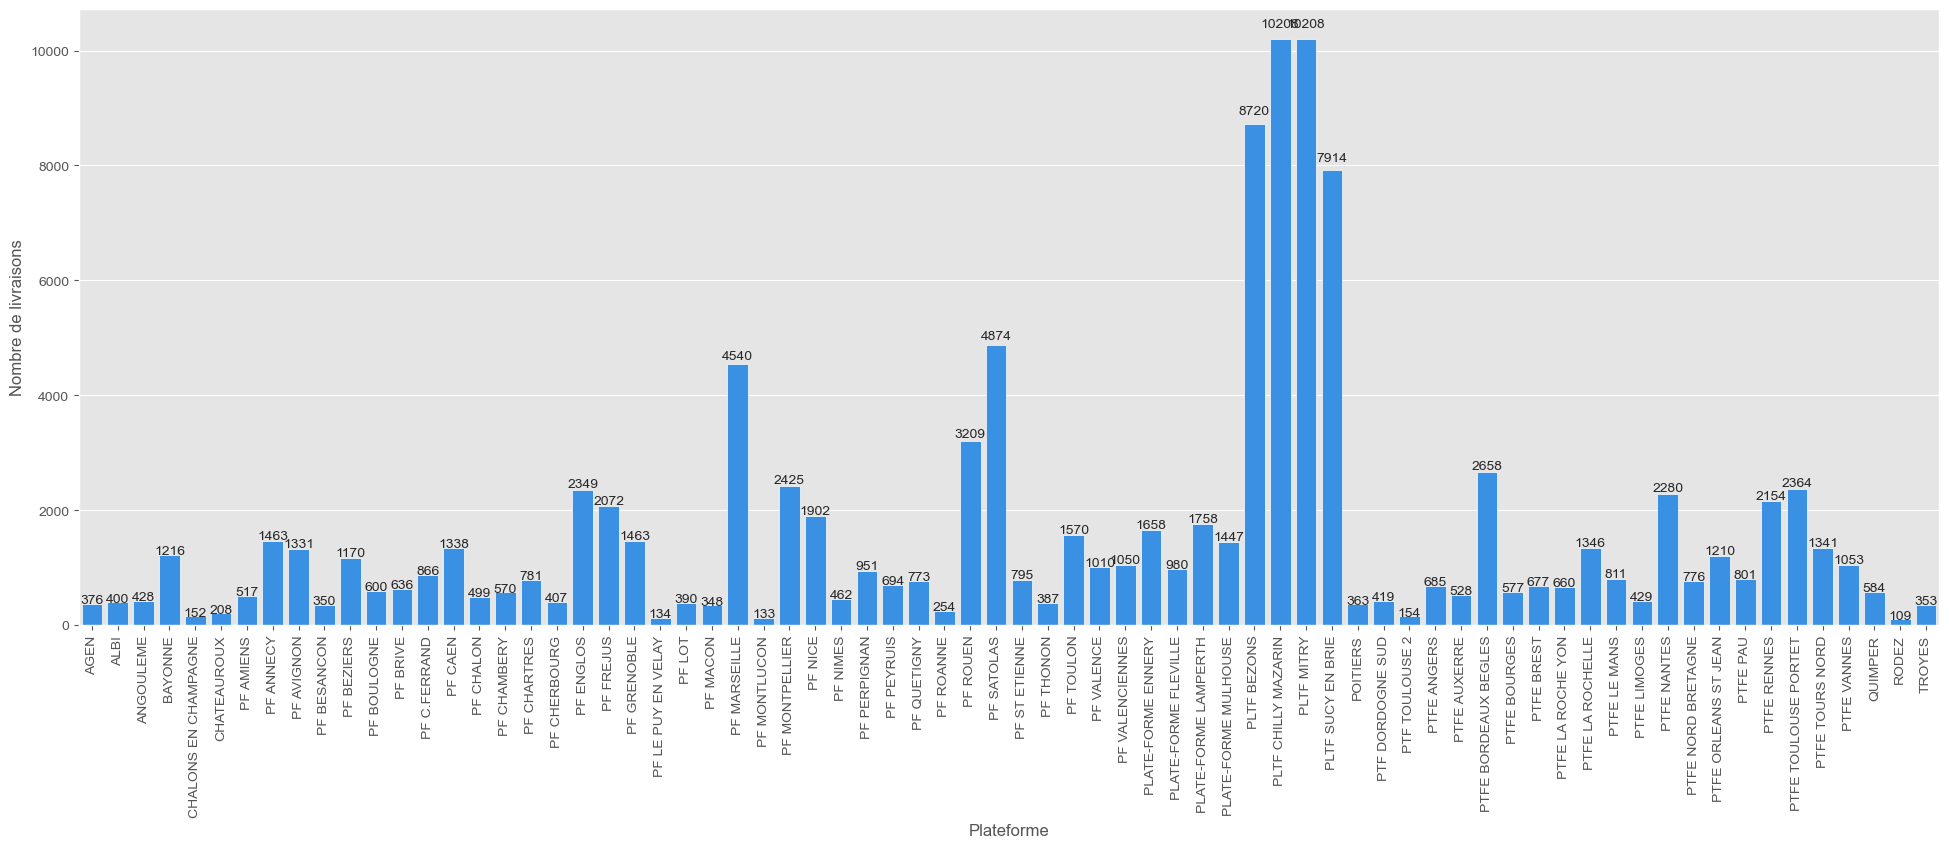

In [9]:
from gistools.plotting import barplot

barplot(
    shipments.groupby(['depot_name'])['shipment_id'].count().reset_index().rename(columns={'shipment_id': 'no_deliveries'}),
    x='depot_name', y='no_deliveries',
    xlabel='Plateforme', ylabel='Nombre de livraisons', xorient=90,
    figsize=(24,8)
);

In [10]:
PLATFORM = 'PF ROUEN'
output_filename = 'dataset_{}.pickle'.format(PLATFORM.replace(' ', '_'))
output_filename    

'dataset_PF_ROUEN.pickle'

In [11]:
shipments['shipment_type'] = 'delivery'
shipments.loc[shipments['store_pickup'] == True, 'shipment_type'] = 'store_pickup_and_delivery'

In [12]:
len(shipments.where(('shipment_type', '==', 'store_pickup_and_delivery'))) == len(shipments.where(('store_pickup', '==', True)))

True

In [13]:
shipments = shipments.where(('depot_name', '==', PLATFORM))

print('{}'.format(len(shipments)))
shipments.head()

3209


,id,shipment_name,shipment_id,input_address,input_postal_code,input_city,location_code,no_items,no_items_primary,no_items_second,no_references,weight_kg,pickup_location_id,store_pickup,setup,encasement,smart_tv,product_category_id,product_category_id_primary,product_category_name,depot_id,depot_short_name,depot_name,time_slot,duration,duration_text,duration_bin,duration_bin_text,initial_route_id,initial_route_short_name,initial_route_name,initial_route_external_id,initial_route_date,initial_route_datetime,year,month,day,weekday,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,initial_delay,initial_delay_text,customer_service,visit_type,visit_requirements,period,time_window_start,soft_time_window_start,time_window_end,soft_time_window_end,cost_per_hour_before_soft_start_time,cost_per_hour_after_soft_end_time,formatted_address,place_id,plus_code,address,postal_code,city,location_type,confidence,maps_URL,longitude,latitude,geometry,start_datetime,end_datetime,start_timestamp,end_timestamp,shipment_type
60645,33675,33675,11349,340 RUE JULES FERRY,76480,DUCLAIR,411,1,1,0,1,27800,961411,False,N,N,N,TV07,['TV07'],TV LCD 60A69 POUCES,961079,PF GRAND QUEVILLY,PF ROUEN,AM,7,00:07:00,10,<=10,2023-03-01 ROUEN AA079AA,1,AA079AA,533,2023-03-01,2023-03-01 09:08:55,2023,3,1,3,2.0,Duo,duo,7:42:18,2023-03-01 07:42:18,9:08:55,1,207,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"340 Rue Jules Ferry, 76480 Duclair, France",EiozNDAgUnVlIEp1bGVzIEZlcnJ5LCA3NjQ4MCBEdWNsYWlyLCBGcmFuY2UiMRIvChQKEgkht22b1frgRxGjaJzyTAGKfxDU...,8FX2FVMH+XH,340 Rue Jules Ferry,76480,Duclair,RANGE_INTERPOLATED,1.00,https://www.google.com/maps/search/?api=1&query=49.484888%2C0.878957&query_place_id=EiozNDAgUnVl...,0.878957,49.484888,POINT (0.87896 49.48489),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,1677675600,delivery
60646,33674,33674,11345,340 RUE JULES FERRY,76480,DUCLAIR,411,3,3,0,3,171100,961411,False,N,N,N,FOUR|AMERI|MLV,"['FOUR', 'AMERI', 'MLV']",FOUR A ENCASTRER|REF-AMERICAIN|LAVE VAISSELLE,961079,PF GRAND QUEVILLY,PF ROUEN,AM,21,00:21:00,30,<=30,2023-03-01 ROUEN AA079AA,1,AA079AA,533,2023-03-01,2023-03-01 09:10:16,2023,3,1,3,2.0,Duo,duo,7:42:18,2023-03-01 07:42:18,9:10:16,2,207,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"340 Rue Jules Ferry, 76480 Duclair, France",EiozNDAgUnVlIEp1bGVzIEZlcnJ5LCA3NjQ4MCBEdWNsYWlyLCBGcmFuY2UiMRIvChQKEgkht22b1frgRxGjaJzyTAGKfxDU...,8FX2FVMH+XH,340 Rue Jules Ferry,76480,Duclair,RANGE_INTERPOLATED,1.00,https://www.google.com/maps/search/?api=1&query=49.484888%2C0.878957&query_place_id=EiozNDAgUnVl...,0.878957,49.484888,POINT (0.87896 49.48489),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,1677675600,delivery
60647,33673,33673,7638,3 RUE EDOUARD BRANLY,76580,LE TRAIT,122,1,1,0,1,50000,961122,False,O,N,N,CTM,['CTM'],LIVRAISON SAV,961079,PF GRAND QUEVILLY,PF ROUEN,AM,20,00:20:00,20,<=20,2023-03-01 ROUEN AA079AA,1,AA079AA,533,2023-03-01,2023-03-01 10:06:53,2023,3,1,3,5.0,Duo,mono,7:42:18,2023-03-01 07:42:18,10:06:53,3,207,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,mono,mono|duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"3 Rue Edouard Branly, 76580 Le Trait, France",ChIJuaJdm7f74EcRvblmILm2xAo,8FX2FRF8+XQ,3 Rue Edouard Branly,76580,Le Trait,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=49.474950%2C0.816934&query_place_id=ChIJuaJdm7f7...,0.816934,49.474950,POINT (0.81693 49.47495),2023-03-01 07:30:00,2023-03-01 14:00:00,16776

In [14]:
depots = pandas.read_csv('_dataset/depots.csv', sep=',')

print('{}'.format(len(depots)))
depots.head()

72


,id,name,depot_id,depot_short_name,depot_name,input_address,input_postal_code,input_city,location_updated,formatted_address,maps_URL,longitude,latitude,geometry,no_deliveries
0,0,AGEN,916037,PF AGEN,AGEN,"ZAC Agend Sud, Av. du Midi",47000,AGEN,True,"Zac, Av. d'Espagne, 47000 Agen, France",https://www.google.com/maps/search/?api=1&query=44.185500%2C0.618162&query_place_id=ChIJU9NEnyWz...,0.618162,44.185500,POINT (0.618162 44.1855),376
1,1,ALBI,916031,PF ALBI,ALBI,CC Les Portes d'Albi / ZAC de Fonlabour,81000,Albi,True,"ZAC De Fonlabour, 81000 Albi, France",https://www.google.com/maps/search/?api=1&query=43.919871%2C2.108303&query_place_id=ChIJZbsqAdLc...,2.108303,43.919871,POINT (2.108303 43.919871),400
2,2,PF AMIENS,961075,PF AMIENS,PF AMIENS,"rue Vélasquez, Centre Commercial Nord, 80080 Amiens",80080,Amiens,True,"rue Vélasquez, Centre Commercial Nord, 80080 Amiens, France",https://www.google.com/maps/search/?api=1&query=49.922575%2C2.300657&query_place_id=ChIJs9mxIpqG...,2.300657,49.922575,POINT (2.300657 49.922575),517
3,3,ANGOULEME,916211,PF ANGOULEME,ANGOULEME,"Cc Chante Merle, Pass. de la Tuilerie, 16400 La Couronne",16420,La Couronne,True,"75 Av. Itzehoe, 16400 La Couronne, France",https://www.google.com/maps/search/?api=1&query=45.621308%2C0.107277&query_place_id=ChIJ3c7dp-cs...,0.107277,45.621308,POINT (0.107277 45.621308),428
4,4,PTFE ANGERS,916172,PF ANGERS,PTFE ANGERS,21 av de la Fontaine 49070 BEAUCOUZE,49070,BEAUCOUZE,True,"Ébeaupin, 49070 Beaucouzé, France",https://www.google.com/maps/search/?api=1&query=47.464363%2C-0.624752&query_place_id=ChIJw4azf5d...,-0.624752,47.464363,POINT (-0.624752 47.464363),685


In [15]:
depots = FleetRoutingEntity(depots)

print('{}'.format(len(depots)))
depots.head()

72


,id,name,depot_id,depot_short_name,depot_name,input_address,input_postal_code,input_city,location_updated,formatted_address,maps_URL,longitude,latitude,geometry,no_deliveries
0,0,AGEN,916037,PF AGEN,AGEN,"ZAC Agend Sud, Av. du Midi",47000,AGEN,True,"Zac, Av. d'Espagne, 47000 Agen, France",https://www.google.com/maps/search/?api=1&query=44.185500%2C0.618162&query_place_id=ChIJU9NEnyWz...,0.618162,44.185500,POINT (0.61816 44.18550),376
1,1,ALBI,916031,PF ALBI,ALBI,CC Les Portes d'Albi / ZAC de Fonlabour,81000,Albi,True,"ZAC De Fonlabour, 81000 Albi, France",https://www.google.com/maps/search/?api=1&query=43.919871%2C2.108303&query_place_id=ChIJZbsqAdLc...,2.108303,43.919871,POINT (2.10830 43.91987),400
2,2,PF AMIENS,961075,PF AMIENS,PF AMIENS,"rue Vélasquez, Centre Commercial Nord, 80080 Amiens",80080,Amiens,True,"rue Vélasquez, Centre Commercial Nord, 80080 Amiens, France",https://www.google.com/maps/search/?api=1&query=49.922575%2C2.300657&query_place_id=ChIJs9mxIpqG...,2.300657,49.922575,POINT (2.30066 49.92258),517
3,3,ANGOULEME,916211,PF ANGOULEME,ANGOULEME,"Cc Chante Merle, Pass. de la Tuilerie, 16400 La Couronne",16420,La Couronne,True,"75 Av. Itzehoe, 16400 La Couronne, France",https://www.google.com/maps/search/?api=1&query=45.621308%2C0.107277&query_place_id=ChIJ3c7dp-cs...,0.107277,45.621308,POINT (0.10728 45.62131),428
4,4,PTFE ANGERS,916172,PF ANGERS,PTFE ANGERS,21 av de la Fontaine 49070 BEAUCOUZE,49070,BEAUCOUZE,True,"Ébeaupin, 49070 Beaucouzé, France",https://www.google.com/maps/search/?api=1&query=47.464363%2C-0.624752&query_place_id=ChIJw4azf5d...,-0.624752,47.464363,POINT (-0.62475 47.46436),685


In [16]:
depots = depots.where(('name', '==', PLATFORM))

print('{}'.format(len(depots)))
depots.head()

1


,id,name,depot_id,depot_short_name,depot_name,input_address,input_postal_code,input_city,location_updated,formatted_address,maps_URL,longitude,latitude,geometry,no_deliveries
57,57,PF ROUEN,961079,PF GRAND QUEVILLY,PF ROUEN,Avenue Emile Basly / Zi du Grand Launay,76120,Le Grand Quevilly,True,"22 Av. Emile Basly, 76120 Le Grand-Quevilly, France",https://www.google.com/maps/search/?api=1&query=49.408566%2C1.030242&query_place_id=ChIJOXDozvPg...,1.030242,49.408566,POINT (1.03024 49.40857),3209


In [17]:
vehicles = pandas.read_csv('_dataset/vehicles.csv', sep=',')

print('{}'.format(len(vehicles)))
vehicles.head()

11319


,vehicle_id,vehicle_name,initial_route_id,initial_route_short_name,initial_route_external_id,depot_id,depot_short_name,depot_name,store_pickup,no_store_pickup,organisation_id,organisation_name,initial_route_date,initial_route_datetime,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,initial_route_distance_text,initial_route_no_deliveries,initial_route_cost,initial_route_cost_text,initial_route_unitary_cost,initial_route_unitary_cost_text,initial_assigned_weight_kg,initial_assigned_weight_kg_text,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,capacity_violation,route_duration_violation,vehicle_type,no_drivers,cost_per_kilometer,fixed_cost,weight_kg,weight_kg_soft_max,weight_kg_cost_per_unit_above_soft_max,route_duration_limit,route_duration_limit_soft_max,route_duration_limit_cost_per_hour_after_soft_max,route_distance_limit,route_distance_limit_soft_max,route_distance_limit_cost_per_hour_after_soft_max,period,earliest_start_time,latest_end_time,lbrk_earliest_start_time,lbrk_latest_start_time,lbrk_duration,eval_route_distance,eval_route_distance_text,eval_route_duration,eval_route_duration_text,eval_route_service_time,eval_route_service_time_text,eval_route_travel_time,eval_route_travel_time_text,eval_route_productivity,eval_route_productivity_text,eval_route_travel_time_ratio,eval_route_travel_time_ratio_text,eval_route_no_deliveries,eval_route_cost,eval_route_cost_text,eval_route_unitary_cost,eval_route_unitary_cost_text,eval_route_cost_Premium,eval_route_cost_Premium_text,eval_route_cost_SD,eval_route_cost_SD_text,eval_route_cost_Prestation,eval_route_cost_Prestation_text,eval_route_unitary_cost_Premium,eval_route_unitary_cost_Premium_text,eval_route_unitary_cost_SD,eval_route_unitary_cost_SD_text,eval_route_unitary_cost_Prestation,eval_route_unitary_cost_Prestation_text,eval_assigned_weight_kg,eval_assigned_weight_kg_text,geometry,longitude,latitude
0,2023-03-01 AGEN2 37B,37B,2023-03-01 AGEN2 37B,1,12,916037,PF AGEN,AGEN,N,0,DARTY,DARTY,2023-03-01,2023-03-01 10:09:58,1,Duo,duo,9:50:30,2023-03-01 09:50:30,10:09:58,1,182,182.0 km,10,497.32,497.3 €,49.732000,49.73 €,366100,366.1 kg,37B,DARTY,37F,Darty,NaN,NaN,False,False,False,False,False,False,False,False,False,duo,1,0.26,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,01/03/2023,07:00:00,23:59:00,11:00:00,13:30:00,30,162.051,162.1 km,22088,06:08:08,11040,03:04:00,11048,03:04:08,0.499819,50.0 %,0.500181,50.0 %,10,492.13326,492.1 €,49.213326,49.21 €,393.706608,393.71 €,98.426652,98.43 €,0.000000,0.00 €,NaN,NaN,NaN,NaN,NaN,NaN,366100,366.1 kg,"MULTILINESTRING ((0.61822 44.18516, 0.62152 44.1847, 0.62213 44.18339, 0.62523 44.18055, 0.63002...",0.618162,44.1855
1,2023-03-01 AGEN2 37E,37E,2023-03-01 AGEN2 37E,2,11,916037,PF AGEN,AGEN,O,1,DARTY,DARTY,2023-03-01,2023-03-01 10:28:07,2,Duo,duo,9:51:39,2023-03-01 09:51:39,10:28:07,1,203,203.0 km,10,502.78,502.8 €,50.278000,50.28 €,470820,470.8 kg,37E,DARTY,37D,Darty,NaN,NaN,False,False,False,False,False,False,True,False,False,duo,2,0.26,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,01/03/2023,07:00:00,23:59:00,11:00:00,13:30:00,30,198.990,199.0 km,22447,06:14:07,10020,02:47:00,12427,03:27:07,0.446385,44.6 %,0.553615,55.4 %,10,501.73740,501.7 €,50.173740,50.17 €,150.521220,150.52 €,301.042440,301.04 €,50.173740,50.17 €,NaN,NaN,NaN,NaN,NaN,NaN,470820,470.8 kg,"MULTILINESTRING ((0.61822 44.18516, 0.6162 44.18712, 0.61614 44.18814, 0.61373 44.19053, 0.61195...",0.618162,44.1855
2,2023-03-02 AGEN2 37B,37B,2023-03-02 AGEN2 37B,1,600,916037,PF AGEN,AGEN,N,0,DARTY,DARTY,2023-03-02,2023-03-02 10:16:33,1,Duo,duo,9:58:06,2023-03-02 09:58:06,10:16:33,1,102,102.0 km,8,476.52,476.5 €,59.565000,59.56 €,379500,379.5 kg,37B,DARTY,37A,Darty,NaN,NaN,False,False,False,False,False,False,Fa

In [18]:
vehicles = reformat_date(vehicles, column='period')

print('{}'.format(len(vehicles)))
vehicles.head()

11319


,vehicle_id,vehicle_name,initial_route_id,initial_route_short_name,initial_route_external_id,depot_id,depot_short_name,depot_name,store_pickup,no_store_pickup,organisation_id,organisation_name,initial_route_date,initial_route_datetime,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,initial_route_distance_text,initial_route_no_deliveries,initial_route_cost,initial_route_cost_text,initial_route_unitary_cost,initial_route_unitary_cost_text,initial_assigned_weight_kg,initial_assigned_weight_kg_text,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,capacity_violation,route_duration_violation,vehicle_type,no_drivers,cost_per_kilometer,fixed_cost,weight_kg,weight_kg_soft_max,weight_kg_cost_per_unit_above_soft_max,route_duration_limit,route_duration_limit_soft_max,route_duration_limit_cost_per_hour_after_soft_max,route_distance_limit,route_distance_limit_soft_max,route_distance_limit_cost_per_hour_after_soft_max,period,earliest_start_time,latest_end_time,lbrk_earliest_start_time,lbrk_latest_start_time,lbrk_duration,eval_route_distance,eval_route_distance_text,eval_route_duration,eval_route_duration_text,eval_route_service_time,eval_route_service_time_text,eval_route_travel_time,eval_route_travel_time_text,eval_route_productivity,eval_route_productivity_text,eval_route_travel_time_ratio,eval_route_travel_time_ratio_text,eval_route_no_deliveries,eval_route_cost,eval_route_cost_text,eval_route_unitary_cost,eval_route_unitary_cost_text,eval_route_cost_Premium,eval_route_cost_Premium_text,eval_route_cost_SD,eval_route_cost_SD_text,eval_route_cost_Prestation,eval_route_cost_Prestation_text,eval_route_unitary_cost_Premium,eval_route_unitary_cost_Premium_text,eval_route_unitary_cost_SD,eval_route_unitary_cost_SD_text,eval_route_unitary_cost_Prestation,eval_route_unitary_cost_Prestation_text,eval_assigned_weight_kg,eval_assigned_weight_kg_text,geometry,longitude,latitude
0,2023-03-01 AGEN2 37B,37B,2023-03-01 AGEN2 37B,1,12,916037,PF AGEN,AGEN,N,0,DARTY,DARTY,2023-03-01,2023-03-01 10:09:58,1,Duo,duo,9:50:30,2023-03-01 09:50:30,10:09:58,1,182,182.0 km,10,497.32,497.3 €,49.732000,49.73 €,366100,366.1 kg,37B,DARTY,37F,Darty,NaN,NaN,False,False,False,False,False,False,False,False,False,duo,1,0.26,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,162.051,162.1 km,22088,06:08:08,11040,03:04:00,11048,03:04:08,0.499819,50.0 %,0.500181,50.0 %,10,492.13326,492.1 €,49.213326,49.21 €,393.706608,393.71 €,98.426652,98.43 €,0.000000,0.00 €,NaN,NaN,NaN,NaN,NaN,NaN,366100,366.1 kg,"MULTILINESTRING ((0.61822 44.18516, 0.62152 44.1847, 0.62213 44.18339, 0.62523 44.18055, 0.63002...",0.618162,44.1855
1,2023-03-01 AGEN2 37E,37E,2023-03-01 AGEN2 37E,2,11,916037,PF AGEN,AGEN,O,1,DARTY,DARTY,2023-03-01,2023-03-01 10:28:07,2,Duo,duo,9:51:39,2023-03-01 09:51:39,10:28:07,1,203,203.0 km,10,502.78,502.8 €,50.278000,50.28 €,470820,470.8 kg,37E,DARTY,37D,Darty,NaN,NaN,False,False,False,False,False,False,True,False,False,duo,2,0.26,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,198.990,199.0 km,22447,06:14:07,10020,02:47:00,12427,03:27:07,0.446385,44.6 %,0.553615,55.4 %,10,501.73740,501.7 €,50.173740,50.17 €,150.521220,150.52 €,301.042440,301.04 €,50.173740,50.17 €,NaN,NaN,NaN,NaN,NaN,NaN,470820,470.8 kg,"MULTILINESTRING ((0.61822 44.18516, 0.6162 44.18712, 0.61614 44.18814, 0.61373 44.19053, 0.61195...",0.618162,44.1855
2,2023-03-02 AGEN2 37B,37B,2023-03-02 AGEN2 37B,1,600,916037,PF AGEN,AGEN,N,0,DARTY,DARTY,2023-03-02,2023-03-02 10:16:33,1,Duo,duo,9:58:06,2023-03-02 09:58:06,10:16:33,1,102,102.0 km,8,476.52,476.5 €,59.565000,59.56 €,379500,379.5 kg,37B,DARTY,37A,Darty,NaN,NaN,False,False,False,False,False,False,Fa

In [19]:
vehicles = FleetRoutingEntity(vehicles).set_time_window(columns=['period', 'earliest_start_time', 'latest_end_time'])

print('{}'.format(len(vehicles)))
vehicles.head()

11319


,vehicle_id,vehicle_name,initial_route_id,initial_route_short_name,initial_route_external_id,depot_id,depot_short_name,depot_name,store_pickup,no_store_pickup,organisation_id,organisation_name,initial_route_date,initial_route_datetime,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,initial_route_distance_text,initial_route_no_deliveries,initial_route_cost,initial_route_cost_text,initial_route_unitary_cost,initial_route_unitary_cost_text,initial_assigned_weight_kg,initial_assigned_weight_kg_text,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,capacity_violation,route_duration_violation,vehicle_type,no_drivers,cost_per_kilometer,fixed_cost,weight_kg,weight_kg_soft_max,weight_kg_cost_per_unit_above_soft_max,route_duration_limit,route_duration_limit_soft_max,route_duration_limit_cost_per_hour_after_soft_max,route_distance_limit,route_distance_limit_soft_max,route_distance_limit_cost_per_hour_after_soft_max,period,earliest_start_time,latest_end_time,lbrk_earliest_start_time,lbrk_latest_start_time,lbrk_duration,eval_route_distance,eval_route_distance_text,eval_route_duration,eval_route_duration_text,eval_route_service_time,eval_route_service_time_text,eval_route_travel_time,eval_route_travel_time_text,eval_route_productivity,eval_route_productivity_text,eval_route_travel_time_ratio,eval_route_travel_time_ratio_text,eval_route_no_deliveries,eval_route_cost,eval_route_cost_text,eval_route_unitary_cost,eval_route_unitary_cost_text,eval_route_cost_Premium,eval_route_cost_Premium_text,eval_route_cost_SD,eval_route_cost_SD_text,eval_route_cost_Prestation,eval_route_cost_Prestation_text,eval_route_unitary_cost_Premium,eval_route_unitary_cost_Premium_text,eval_route_unitary_cost_SD,eval_route_unitary_cost_SD_text,eval_route_unitary_cost_Prestation,eval_route_unitary_cost_Prestation_text,eval_assigned_weight_kg,eval_assigned_weight_kg_text,geometry,longitude,latitude,start_datetime,end_datetime,start_timestamp,end_timestamp
0,2023-03-01 AGEN2 37B,37B,2023-03-01 AGEN2 37B,1,12,916037,PF AGEN,AGEN,N,0,DARTY,DARTY,2023-03-01,2023-03-01 10:09:58,1,Duo,duo,9:50:30,2023-03-01 09:50:30,10:09:58,1,182,182.0 km,10,497.32,497.3 €,49.732000,49.73 €,366100,366.1 kg,37B,DARTY,37F,Darty,NaN,NaN,False,False,False,False,False,False,False,False,False,duo,1,0.26,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,162.051,162.1 km,22088,06:08:08,11040,03:04:00,11048,03:04:08,0.499819,50.0 %,0.500181,50.0 %,10,492.13326,492.1 €,49.213326,49.21 €,393.706608,393.71 €,98.426652,98.43 €,0.000000,0.00 €,NaN,NaN,NaN,NaN,NaN,NaN,366100,366.1 kg,"MULTILINESTRING ((0.61822 44.18516, 0.62152 44.18470, 0.62213 44.18339, 0.62523 44.18055, 0.6300...",0.618162,44.1855,2023-03-01 07:00:00,2023-03-01 23:59:00,1677650400,1677711540
1,2023-03-01 AGEN2 37E,37E,2023-03-01 AGEN2 37E,2,11,916037,PF AGEN,AGEN,O,1,DARTY,DARTY,2023-03-01,2023-03-01 10:28:07,2,Duo,duo,9:51:39,2023-03-01 09:51:39,10:28:07,1,203,203.0 km,10,502.78,502.8 €,50.278000,50.28 €,470820,470.8 kg,37E,DARTY,37D,Darty,NaN,NaN,False,False,False,False,False,False,True,False,False,duo,2,0.26,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,198.990,199.0 km,22447,06:14:07,10020,02:47:00,12427,03:27:07,0.446385,44.6 %,0.553615,55.4 %,10,501.73740,501.7 €,50.173740,50.17 €,150.521220,150.52 €,301.042440,301.04 €,50.173740,50.17 €,NaN,NaN,NaN,NaN,NaN,NaN,470820,470.8 kg,"MULTILINESTRING ((0.61822 44.18516, 0.61620 44.18712, 0.61614 44.18814, 0.61373 44.19053, 0.6119...",0.618162,44.1855,2023-03-01 07:00:00,2023-03-01 23:59:00,1677650400,1677711540
2,2023-03-02 AGEN2 37B,37B,2023-03-02 AGEN2 37B,1,600,916037,PF AGEN,AGEN,N,0,DARTY,DARTY,2023-03-02,2023-03-02 10:16:

In [20]:
vehicles = vehicles.where(('depot_name', '==', PLATFORM))

print('{}'.format(len(vehicles)))
vehicles.head()

319


,vehicle_id,vehicle_name,initial_route_id,initial_route_short_name,initial_route_external_id,depot_id,depot_short_name,depot_name,store_pickup,no_store_pickup,organisation_id,organisation_name,initial_route_date,initial_route_datetime,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,initial_route_distance_text,initial_route_no_deliveries,initial_route_cost,initial_route_cost_text,initial_route_unitary_cost,initial_route_unitary_cost_text,initial_assigned_weight_kg,initial_assigned_weight_kg_text,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,capacity_violation,route_duration_violation,vehicle_type,no_drivers,cost_per_kilometer,fixed_cost,weight_kg,weight_kg_soft_max,weight_kg_cost_per_unit_above_soft_max,route_duration_limit,route_duration_limit_soft_max,route_duration_limit_cost_per_hour_after_soft_max,route_distance_limit,route_distance_limit_soft_max,route_distance_limit_cost_per_hour_after_soft_max,period,earliest_start_time,latest_end_time,lbrk_earliest_start_time,lbrk_latest_start_time,lbrk_duration,eval_route_distance,eval_route_distance_text,eval_route_duration,eval_route_duration_text,eval_route_service_time,eval_route_service_time_text,eval_route_travel_time,eval_route_travel_time_text,eval_route_productivity,eval_route_productivity_text,eval_route_travel_time_ratio,eval_route_travel_time_ratio_text,eval_route_no_deliveries,eval_route_cost,eval_route_cost_text,eval_route_unitary_cost,eval_route_unitary_cost_text,eval_route_cost_Premium,eval_route_cost_Premium_text,eval_route_cost_SD,eval_route_cost_SD_text,eval_route_cost_Prestation,eval_route_cost_Prestation_text,eval_route_unitary_cost_Premium,eval_route_unitary_cost_Premium_text,eval_route_unitary_cost_SD,eval_route_unitary_cost_SD_text,eval_route_unitary_cost_Prestation,eval_route_unitary_cost_Prestation_text,eval_assigned_weight_kg,eval_assigned_weight_kg_text,geometry,longitude,latitude,start_datetime,end_datetime,start_timestamp,end_timestamp
4690,2023-03-01 ROUEN AA079AA,AA079AA,2023-03-01 ROUEN AA079AA,1,533,961079,PF GRAND QUEVILLY,PF ROUEN,N,0,SST,SST,2023-03-01,2023-03-01 09:08:55,2,Duo,duo,7:42:18,2023-03-01 07:42:18,9:08:55,1,207,207.0 km,12,535.50,535.5 €,44.625000,44.62 €,695450,695.5 kg,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,True,False,False,duo,2,0.00,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,210.209,210.2 km,25960,07:12:40,12120,03:22:00,13840,03:50:40,0.466872,46.7 %,0.533128,53.3 %,12,540.31350,540.3 €,45.026125,45.03 €,360.209000,360.21 €,180.104500,180.10 €,0.0,0.00 €,NaN,NaN,NaN,NaN,NaN,NaN,695450,695.5 kg,"MULTILINESTRING ((1.02977 49.40873, 1.03413 49.40943, 1.03588 49.40885, 1.03676 49.40875, 1.0393...",1.030242,49.408566,2023-03-01 07:00:00,2023-03-01 23:59:00,1677650400,1677711540
4691,2023-03-01 ROUEN AA079AB,AA079AB,2023-03-01 ROUEN AA079AB,2,535,961079,PF GRAND QUEVILLY,PF ROUEN,N,0,SST,SST,2023-03-01,2023-03-01 08:15:10,2,Duo,duo,7:48:05,2023-03-01 07:48:05,8:15:10,1,242,242.0 km,14,588.00,588.0 €,42.000000,42.00 €,614690,614.7 kg,AA079AB,SST,AA079AO,SST,NaN,NaN,False,False,False,False,False,False,False,False,True,duo,2,0.00,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,231.823,231.8 km,28388,07:53:08,13440,03:44:00,14948,04:09:08,0.473439,47.3 %,0.526561,52.7 %,14,572.73450,572.7 €,40.909607,40.91 €,490.915286,490.92 €,81.819214,81.82 €,0.0,0.00 €,NaN,NaN,NaN,NaN,NaN,NaN,614690,614.7 kg,"MULTILINESTRING ((1.02977 49.40873, 1.03588 49.40885, 1.03676 49.40875, 1.03935 49.40943, 1.0545...",1.030242,49.408566,2023-03-01 07:00:00,2023-03-01 23:59:00,1677650400,1677711540
4692,2023-03-01 ROUEN AA079B,AA079B,2023-03-01 ROUEN AA079B,3,525,961

In [21]:
stores = pandas.read_csv('_dataset/stores.csv', sep=',')

stores = stores.rename(columns={'external_id': 'store_id', 'name': 'store_name'})

print('{}'.format(len(stores)))
stores.head()

251


,id,store_id,store_name,description,longitude,latitude,plus_code,geometry,input_text,threshold_on_name,threshold_on_city,threshold_on_postal_code,threshold_on_addr,threshold,formatted_address,street_number,street,address,city,city_id,sub_locality,postal_code,admin_area_level_2,admin_area_level_1,country,country_code,location_type,location_accuracy,place_id,place_name,place_type,place_main_type,place_main_type_id,place_brand,confidence,confidence_on_name,confidence_on_addr,confidence_on_city,confidence_on_postal_code,confidence_on_country,accepted,api_used,maps_URL,place_URL,website,phone,email,monday,tuesday,wednesday,thursday,friday,saturday,sunday,input_address,input_postal_code,input_city,distance
0,0,916446,FRA-VILLENEUVE SUR LOT,NaN,0.681789,44.404530,8FP2CM3J+RP,POINT (0.681789 44.40453),AVENUE DE BORDEAUX 47300 BIAS,0.0,0.9,1,0.0,0.85,"742 Av. de Bordeaux, 47300 Bias, France",742,Avenue de Bordeaux,742 Avenue de Bordeaux,Bias,NaN,NaN,47300.0,Lot-et-Garonne,Nouvelle-Aquitaine,France,fr,ROOFTOP,4,ChIJ__-_y1MHqxIRGoTtXixIMko,DARTY Villeneuve Sur Lot,"['electronics_store', 'furniture_store', 'home_goods_store', 'point_of_interest', 'store', 'esta...",electronics_store,NaN,DARTY,0.83,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=44.404530%2C0.681789&query_place_id=ChIJ__-_y1MH...,https://maps.google.com/?cid=5346415063050585114,https://magasin.darty.com/349-darty-villeneuve-sur-lot?utm_source=gmb,+33 892 01 10 10,NaN,09:30-19:30,09:30-19:30,09:30-19:30,09:30-19:30,09:30-19:30,09:30-19:30,NaN,Avenue De Bordeaux,47300,BIAS,296.119144
1,1,945412,FRA-GEX,NaN,6.054045,46.324806,8FR883F3+WJ,POINT (6.054045 46.324806),CENTRE COMMERCIAL LES VERTES CAMPAGNE 1170 GEX,0.0,0.9,1,0.0,0.85,"Centre Commercial, 75 Rue des Vertes Campagnes, 01170 Gex, France",75,Rue des Vertes Campagnes,75 Rue des Vertes Campagnes,Gex,NaN,NaN,1170.0,Ain,Auvergne-Rhône-Alpes,France,fr,ROOFTOP,4,ChIJ-_8eOzZgjEcR4QfudEgNLgA,Darty,"['electronics_store', 'home_goods_store', 'point_of_interest', 'store', 'establishment']",electronics_store,NaN,DARTY,0.92,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=46.324806%2C6.054045&query_place_id=ChIJ-_8eOzZg...,https://maps.google.com/?cid=12962453779253217,https://magasin.darty.com/229-darty-gex?utm_source=gmb,+33 892 01 10 10,NaN,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-19:00,NaN,Centre Commercial Les Vertes Campagne,1170,GEX,33.022303
2,2,916483,FRA-BENESSE MAREMNE,NaN,-1.396150,43.630610,8CMWJJJ3+6G,POINT (-1.39615 43.63061),2205 ROUTE DE CAP BRETON 40230 BENESSE MAREMNE,0.0,0.9,1,0.0,0.85,"2205 B, Rte de Capbreton, 40230 Bénesse-Maremne, France",NaN,Route de Capbreton,Route de Capbreton,Bénesse-Maremne,NaN,NaN,40230.0,Landes,Nouvelle-Aquitaine,France,fr,ROOFTOP,4,ChIJxRWJuZFbUQ0RUmHWVkKYiC8,DARTY Capbreton Benesse Maremne,"['electronics_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment']",electronics_store,NaN,DARTY,0.97,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=43.630610%2C-1.396150&query_place_id=ChIJxRWJuZF...,https://maps.google.com/?cid=3425154927307415890,https://magasin.darty.com/391-darty-capbreton-benesse-maremne?utm_source=gmb,+33 892 01 10 10,NaN,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,NaN,2205 route de Cap Breton,40230,Benesse Maremne,18.785919
3,3,991422,FRA-CLERMONT L'HÉRAULT,NaN,3.451473,43.619727,8FM5JF92+VH,POINT (3.451473 43.619727),PAE DE LA VALLEE DE L'HERAULT3 RUE DE LA CLAIRETTE 34800 CLERMONT L'HERAULT,0.0,0.9,1,0.0,0.85,"PAE de la Vallée de L'hérault, 3 Rue de la Clairette, 34800 Clermont-l'Hérault, France",3,Rue de la Clairette,3 Rue de la Clairette,Clermont-l'Hérault,NaN,NaN,34800.0,Hérault,Occitanie,France,fr,ROOFTOP,4,ChIJU-pAr39dsRIRWbT-BF0SYgI,DARTY Clermont l'

In [22]:
stores = FleetRoutingEntity(stores)

print('{}'.format(len(stores)))
stores.head()

251


,id,store_id,store_name,description,longitude,latitude,plus_code,geometry,input_text,threshold_on_name,threshold_on_city,threshold_on_postal_code,threshold_on_addr,threshold,formatted_address,street_number,street,address,city,city_id,sub_locality,postal_code,admin_area_level_2,admin_area_level_1,country,country_code,location_type,location_accuracy,place_id,place_name,place_type,place_main_type,place_main_type_id,place_brand,confidence,confidence_on_name,confidence_on_addr,confidence_on_city,confidence_on_postal_code,confidence_on_country,accepted,api_used,maps_URL,place_URL,website,phone,email,monday,tuesday,wednesday,thursday,friday,saturday,sunday,input_address,input_postal_code,input_city,distance
0,0,916446,FRA-VILLENEUVE SUR LOT,NaN,0.681789,44.404530,8FP2CM3J+RP,POINT (0.68179 44.40453),AVENUE DE BORDEAUX 47300 BIAS,0.0,0.9,1,0.0,0.85,"742 Av. de Bordeaux, 47300 Bias, France",742,Avenue de Bordeaux,742 Avenue de Bordeaux,Bias,NaN,NaN,47300.0,Lot-et-Garonne,Nouvelle-Aquitaine,France,fr,ROOFTOP,4,ChIJ__-_y1MHqxIRGoTtXixIMko,DARTY Villeneuve Sur Lot,"['electronics_store', 'furniture_store', 'home_goods_store', 'point_of_interest', 'store', 'esta...",electronics_store,NaN,DARTY,0.83,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=44.404530%2C0.681789&query_place_id=ChIJ__-_y1MH...,https://maps.google.com/?cid=5346415063050585114,https://magasin.darty.com/349-darty-villeneuve-sur-lot?utm_source=gmb,+33 892 01 10 10,NaN,09:30-19:30,09:30-19:30,09:30-19:30,09:30-19:30,09:30-19:30,09:30-19:30,NaN,Avenue De Bordeaux,47300,BIAS,296.119144
1,1,945412,FRA-GEX,NaN,6.054045,46.324806,8FR883F3+WJ,POINT (6.05405 46.32481),CENTRE COMMERCIAL LES VERTES CAMPAGNE 1170 GEX,0.0,0.9,1,0.0,0.85,"Centre Commercial, 75 Rue des Vertes Campagnes, 01170 Gex, France",75,Rue des Vertes Campagnes,75 Rue des Vertes Campagnes,Gex,NaN,NaN,1170.0,Ain,Auvergne-Rhône-Alpes,France,fr,ROOFTOP,4,ChIJ-_8eOzZgjEcR4QfudEgNLgA,Darty,"['electronics_store', 'home_goods_store', 'point_of_interest', 'store', 'establishment']",electronics_store,NaN,DARTY,0.92,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=46.324806%2C6.054045&query_place_id=ChIJ-_8eOzZg...,https://maps.google.com/?cid=12962453779253217,https://magasin.darty.com/229-darty-gex?utm_source=gmb,+33 892 01 10 10,NaN,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-12:30|14:00-19:00,10:00-19:00,NaN,Centre Commercial Les Vertes Campagne,1170,GEX,33.022303
2,2,916483,FRA-BENESSE MAREMNE,NaN,-1.396150,43.630610,8CMWJJJ3+6G,POINT (-1.39615 43.63061),2205 ROUTE DE CAP BRETON 40230 BENESSE MAREMNE,0.0,0.9,1,0.0,0.85,"2205 B, Rte de Capbreton, 40230 Bénesse-Maremne, France",NaN,Route de Capbreton,Route de Capbreton,Bénesse-Maremne,NaN,NaN,40230.0,Landes,Nouvelle-Aquitaine,France,fr,ROOFTOP,4,ChIJxRWJuZFbUQ0RUmHWVkKYiC8,DARTY Capbreton Benesse Maremne,"['electronics_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment']",electronics_store,NaN,DARTY,0.97,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=43.630610%2C-1.396150&query_place_id=ChIJxRWJuZF...,https://maps.google.com/?cid=3425154927307415890,https://magasin.darty.com/391-darty-capbreton-benesse-maremne?utm_source=gmb,+33 892 01 10 10,NaN,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,NaN,2205 route de Cap Breton,40230,Benesse Maremne,18.785919
3,3,991422,FRA-CLERMONT L'HÉRAULT,NaN,3.451473,43.619727,8FM5JF92+VH,POINT (3.45147 43.61973),PAE DE LA VALLEE DE L'HERAULT3 RUE DE LA CLAIRETTE 34800 CLERMONT L'HERAULT,0.0,0.9,1,0.0,0.85,"PAE de la Vallée de L'hérault, 3 Rue de la Clairette, 34800 Clermont-l'Hérault, France",3,Rue de la Clairette,3 Rue de la Clairette,Clermont-l'Hérault,NaN,NaN,34800.0,Hérault,Occitanie,France,fr,ROOFTOP,4,ChIJU-pAr39dsRIRWbT-BF0SYgI,DARTY Clermont l'Hérau

In [23]:
store_list = drop_duplicates(shipments[shipments['store_pickup'] == True]['pickup_location_id'].tolist())
store_list

[961424, 961260, 961411, 961425, 961502, 961434, 961032, 961418, 961025]

In [24]:
stores = stores[stores['store_id'].isin(store_list)]

print('{}'.format(len(stores)))
stores.head()

8


,id,store_id,store_name,description,longitude,latitude,plus_code,geometry,input_text,threshold_on_name,threshold_on_city,threshold_on_postal_code,threshold_on_addr,threshold,formatted_address,street_number,street,address,city,city_id,sub_locality,postal_code,admin_area_level_2,admin_area_level_1,country,country_code,location_type,location_accuracy,place_id,place_name,place_type,place_main_type,place_main_type_id,place_brand,confidence,confidence_on_name,confidence_on_addr,confidence_on_city,confidence_on_postal_code,confidence_on_country,accepted,api_used,maps_URL,place_URL,website,phone,email,monday,tuesday,wednesday,thursday,friday,saturday,sunday,input_address,input_postal_code,input_city,distance
36,36,961424,FRA-YVETOT,NaN,0.775338,49.614870,8FX2JQ7G+W4,POINT (0.77534 49.61487),20 AVENUE MICHELINE OSTREMEYER 76190 YVETOT,0.0,0.9,1,0.0,0.85,"20 Av. Micheline Ostermeyer, 76190 Yvetot, France",20,Avenue Micheline Ostermeyer,20 Avenue Micheline Ostermeyer,Yvetot,NaN,NaN,76190.0,Seine-Maritime,Normandie,France,fr,ROOFTOP,4,ChIJ63MPIRj04EcRx0-Omp1Zn6c,DARTY Yvetot,"['electronics_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment']",electronics_store,NaN,DARTY,1.00,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=49.614870%2C0.775338&query_place_id=ChIJ63MPIRj0...,https://maps.google.com/?cid=12078471259068714951,https://magasin.darty.com/289-darty-yvetot?utm_source=gmb,+33 892 01 10 10,NaN,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-19:00,NaN,20 avenue Micheline Ostremeyer,76190,YVETOT,11.283835
37,37,961425,FRA-NEUFCHATEL EN BRAY,NaN,1.435743,49.735814,8FX3PCPP+87,POINT (1.43574 49.73581),"2, RUE CHARLES GERVAIS 76270 NEUFCHATEL EN BRAY",0.0,0.9,1,0.0,0.85,"2 Rue la Grande Flandre, 76270 Neufchâtel-en-Bray, France",2,Rue la Grande Flandre,2 Rue la Grande Flandre,Neufchâtel-en-Bray,NaN,NaN,76270.0,Seine-Maritime,Normandie,France,fr,ROOFTOP,4,ChIJXWfGpTNL50cRs7mbj0pFihw,DARTY Neufchâtel en Bray,"['electronics_store', 'furniture_store', 'home_goods_store', 'point_of_interest', 'store', 'esta...",electronics_store,NaN,DARTY,1.00,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=49.735814%2C1.435743&query_place_id=ChIJXWfGpTNL...,https://maps.google.com/?cid=2056532366387296691,https://magasin.darty.com/283-darty-neufchatel-en-bray?utm_source=gmb,+33 892 01 10 10,NaN,14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-19:00,NaN,"2, rue Charles Gervais",76270,NEUFCHATEL EN BRAY,178.576627
38,38,961411,FRA-PONT AUDEMER,NaN,0.523705,49.347952,8FX28GXF+5F,POINT (0.52370 49.34795),RUE DE ST ULFRANT 27500 PONT AUDEMER,0.0,0.9,1,0.0,0.85,"Rue du Maquis Surcouf, 27500 Pont-Audemer, France",NaN,Rue du Maquis Surcouf,Rue du Maquis Surcouf,Pont-Audemer,NaN,NaN,27500.0,Eure,Normandie,France,fr,ROOFTOP,4,ChIJPQQNnhyz4UcRPVeeFAIC7Bs,FNAC Pont-Audemer,"['department_store', 'book_store', 'electronics_store', 'home_goods_store', 'point_of_interest',...",department_store,NaN,FNAC,0.89,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=49.347952%2C0.523705&query_place_id=ChIJPQQNnhyz...,https://maps.google.com/?cid=2011985341486880573,https://www.fnac.com/Pont-Audemer/Fnac-Pont-Audemer/cl725/w-4?utm_source=gmb,+33 2 79 24 00 10,NaN,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,NaN,Rue de St Ulfrant,27500,PONT-AUDEMER,1454.107815
89,89,961434,FRA-MONT SAINT AIGNAN,NaN,1.095373,49.470272,8FX3F3CW+44,POINT (1.09537 49.47027),CCIAL DE LA VATINE RUE FRANCOIS PERROUX 76130 MONT SAINT AIGNAN,0.0,0.9,1,0.0,0.85,"Rue François Perroux, Zac De La Vatine CC de, 76130 Mont-Saint-Aignan, France",NaN,Zac De La Vatine,Zac De La Vatine,Mont-Saint-Aignan,NaN,NaN,76130.0,Seine-Maritime,Normandie,France,fr,ROOFTOP,4,ChIJvy2zW-fd4EcRnOMO3l7R0Sk,Darty Cuisine Literie Mont-Saint

In [25]:
dataset = {
    'shipments': FleetRoutingEntity(shipments),
    'depots'   : FleetRoutingEntity(depots),
    'vehicles' : FleetRoutingEntity(vehicles),
    'stores'   : FleetRoutingEntity(stores)
}

to_pickle(dataset, '_dataset/{}'.format(output_filename))

In [26]:
dataset_r = read_pickle('_dataset/{}'.format(output_filename))

dataset_r.keys()

dict_keys(['shipments', 'depots', 'vehicles', 'stores'])

In [27]:
print('{}'.format(len(shipments)))
dataset_r['shipments'].head()

3209


,id,shipment_name,shipment_id,input_address,input_postal_code,input_city,location_code,no_items,no_items_primary,no_items_second,no_references,weight_kg,pickup_location_id,store_pickup,setup,encasement,smart_tv,product_category_id,product_category_id_primary,product_category_name,depot_id,depot_short_name,depot_name,time_slot,duration,duration_text,duration_bin,duration_bin_text,initial_route_id,initial_route_short_name,initial_route_name,initial_route_external_id,initial_route_date,initial_route_datetime,year,month,day,weekday,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,initial_delay,initial_delay_text,customer_service,visit_type,visit_requirements,period,time_window_start,soft_time_window_start,time_window_end,soft_time_window_end,cost_per_hour_before_soft_start_time,cost_per_hour_after_soft_end_time,formatted_address,place_id,plus_code,address,postal_code,city,location_type,confidence,maps_URL,longitude,latitude,geometry,start_datetime,end_datetime,start_timestamp,end_timestamp,shipment_type
0,33675,33675,11349,340 RUE JULES FERRY,76480,DUCLAIR,411,1,1,0,1,27800,961411,False,N,N,N,TV07,['TV07'],TV LCD 60A69 POUCES,961079,PF GRAND QUEVILLY,PF ROUEN,AM,7,00:07:00,10,<=10,2023-03-01 ROUEN AA079AA,1,AA079AA,533,2023-03-01,2023-03-01 09:08:55,2023,3,1,3,2.0,Duo,duo,7:42:18,2023-03-01 07:42:18,9:08:55,1,207,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"340 Rue Jules Ferry, 76480 Duclair, France",EiozNDAgUnVlIEp1bGVzIEZlcnJ5LCA3NjQ4MCBEdWNsYWlyLCBGcmFuY2UiMRIvChQKEgkht22b1frgRxGjaJzyTAGKfxDU...,8FX2FVMH+XH,340 Rue Jules Ferry,76480,Duclair,RANGE_INTERPOLATED,1.00,https://www.google.com/maps/search/?api=1&query=49.484888%2C0.878957&query_place_id=EiozNDAgUnVl...,0.878957,49.484888,POINT (0.87896 49.48489),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,1677675600,delivery
1,33674,33674,11345,340 RUE JULES FERRY,76480,DUCLAIR,411,3,3,0,3,171100,961411,False,N,N,N,FOUR|AMERI|MLV,"['FOUR', 'AMERI', 'MLV']",FOUR A ENCASTRER|REF-AMERICAIN|LAVE VAISSELLE,961079,PF GRAND QUEVILLY,PF ROUEN,AM,21,00:21:00,30,<=30,2023-03-01 ROUEN AA079AA,1,AA079AA,533,2023-03-01,2023-03-01 09:10:16,2023,3,1,3,2.0,Duo,duo,7:42:18,2023-03-01 07:42:18,9:10:16,2,207,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,SD,duo,duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"340 Rue Jules Ferry, 76480 Duclair, France",EiozNDAgUnVlIEp1bGVzIEZlcnJ5LCA3NjQ4MCBEdWNsYWlyLCBGcmFuY2UiMRIvChQKEgkht22b1frgRxGjaJzyTAGKfxDU...,8FX2FVMH+XH,340 Rue Jules Ferry,76480,Duclair,RANGE_INTERPOLATED,1.00,https://www.google.com/maps/search/?api=1&query=49.484888%2C0.878957&query_place_id=EiozNDAgUnVl...,0.878957,49.484888,POINT (0.87896 49.48489),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,1677675600,delivery
2,33673,33673,7638,3 RUE EDOUARD BRANLY,76580,LE TRAIT,122,1,1,0,1,50000,961122,False,O,N,N,CTM,['CTM'],LIVRAISON SAV,961079,PF GRAND QUEVILLY,PF ROUEN,AM,20,00:20:00,20,<=20,2023-03-01 ROUEN AA079AA,1,AA079AA,533,2023-03-01,2023-03-01 10:06:53,2023,3,1,3,5.0,Duo,mono,7:42:18,2023-03-01 07:42:18,10:06:53,3,207,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,False,0,00:00:00,Premium,mono,mono|duo,2023-03-01,07:30:00,08:00:00,14:00:00,13:00:00,10,100,"3 Rue Edouard Branly, 76580 Le Trait, France",ChIJuaJdm7f74EcRvblmILm2xAo,8FX2FRF8+XQ,3 Rue Edouard Branly,76580,Le Trait,ROOFTOP,1.00,https://www.google.com/maps/search/?api=1&query=49.474950%2C0.816934&query_place_id=ChIJuaJdm7f7...,0.816934,49.474950,POINT (0.81693 49.47495),2023-03-01 07:30:00,2023-03-01 14:00:00,1677652200,167767

In [28]:
print('{}'.format(len(depots)))
dataset_r['depots'].head()

1


,id,name,depot_id,depot_short_name,depot_name,input_address,input_postal_code,input_city,location_updated,formatted_address,maps_URL,longitude,latitude,geometry,no_deliveries
0,57,PF ROUEN,961079,PF GRAND QUEVILLY,PF ROUEN,Avenue Emile Basly / Zi du Grand Launay,76120,Le Grand Quevilly,True,"22 Av. Emile Basly, 76120 Le Grand-Quevilly, France",https://www.google.com/maps/search/?api=1&query=49.408566%2C1.030242&query_place_id=ChIJOXDozvPg...,1.030242,49.408566,POINT (1.03024 49.40857),3209


In [29]:
print('{}'.format(len(vehicles)))
dataset_r['vehicles'].head()

319


,vehicle_id,vehicle_name,initial_route_id,initial_route_short_name,initial_route_external_id,depot_id,depot_short_name,depot_name,store_pickup,no_store_pickup,organisation_id,organisation_name,initial_route_date,initial_route_datetime,eligible_team,assigned_team,initial_route_teaming,initial_route_start_time,initial_route_start_datetime,initial_route_time,initial_route_order_id,initial_route_distance,initial_route_distance_text,initial_route_no_deliveries,initial_route_cost,initial_route_cost_text,initial_route_unitary_cost,initial_route_unitary_cost_text,initial_assigned_weight_kg,initial_assigned_weight_kg_text,driver1_id,driver1_type,driver2_id,driver2_type,driver3_id,driver3_type,inconsistent_date,initial_route_start_time_missing,time_slot_missing,address_missing,code_99_q10,store_not_found,time_window_violation,capacity_violation,route_duration_violation,vehicle_type,no_drivers,cost_per_kilometer,fixed_cost,weight_kg,weight_kg_soft_max,weight_kg_cost_per_unit_above_soft_max,route_duration_limit,route_duration_limit_soft_max,route_duration_limit_cost_per_hour_after_soft_max,route_distance_limit,route_distance_limit_soft_max,route_distance_limit_cost_per_hour_after_soft_max,period,earliest_start_time,latest_end_time,lbrk_earliest_start_time,lbrk_latest_start_time,lbrk_duration,eval_route_distance,eval_route_distance_text,eval_route_duration,eval_route_duration_text,eval_route_service_time,eval_route_service_time_text,eval_route_travel_time,eval_route_travel_time_text,eval_route_productivity,eval_route_productivity_text,eval_route_travel_time_ratio,eval_route_travel_time_ratio_text,eval_route_no_deliveries,eval_route_cost,eval_route_cost_text,eval_route_unitary_cost,eval_route_unitary_cost_text,eval_route_cost_Premium,eval_route_cost_Premium_text,eval_route_cost_SD,eval_route_cost_SD_text,eval_route_cost_Prestation,eval_route_cost_Prestation_text,eval_route_unitary_cost_Premium,eval_route_unitary_cost_Premium_text,eval_route_unitary_cost_SD,eval_route_unitary_cost_SD_text,eval_route_unitary_cost_Prestation,eval_route_unitary_cost_Prestation_text,eval_assigned_weight_kg,eval_assigned_weight_kg_text,geometry,longitude,latitude,start_datetime,end_datetime,start_timestamp,end_timestamp
0,2023-03-01 ROUEN AA079AA,AA079AA,2023-03-01 ROUEN AA079AA,1,533,961079,PF GRAND QUEVILLY,PF ROUEN,N,0,SST,SST,2023-03-01,2023-03-01 09:08:55,2,Duo,duo,7:42:18,2023-03-01 07:42:18,9:08:55,1,207,207.0 km,12,535.50,535.5 €,44.625000,44.62 €,695450,695.5 kg,AA079AA,SST,AA079AW,SST,NaN,NaN,False,False,False,False,False,False,True,False,False,duo,2,0.00,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,210.209,210.2 km,25960,07:12:40,12120,03:22:00,13840,03:50:40,0.466872,46.7 %,0.533128,53.3 %,12,540.31350,540.3 €,45.026125,45.03 €,360.209000,360.21 €,180.104500,180.10 €,0.0,0.00 €,NaN,NaN,NaN,NaN,NaN,NaN,695450,695.5 kg,"MULTILINESTRING ((1.02977 49.40873, 1.03413 49.40943, 1.03588 49.40885, 1.03676 49.40875, 1.0393...",1.030242,49.408566,2023-03-01 07:00:00,2023-03-01 23:59:00,1677650400,1677711540
1,2023-03-01 ROUEN AA079AB,AA079AB,2023-03-01 ROUEN AA079AB,2,535,961079,PF GRAND QUEVILLY,PF ROUEN,N,0,SST,SST,2023-03-01,2023-03-01 08:15:10,2,Duo,duo,7:48:05,2023-03-01 07:48:05,8:15:10,1,242,242.0 km,14,588.00,588.0 €,42.000000,42.00 €,614690,614.7 kg,AA079AB,SST,AA079AO,SST,NaN,NaN,False,False,False,False,False,False,False,False,True,duo,2,0.00,450,750000,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,2023-03-01,07:00:00,23:59:00,11:00:00,13:30:00,30,231.823,231.8 km,28388,07:53:08,13440,03:44:00,14948,04:09:08,0.473439,47.3 %,0.526561,52.7 %,14,572.73450,572.7 €,40.909607,40.91 €,490.915286,490.92 €,81.819214,81.82 €,0.0,0.00 €,NaN,NaN,NaN,NaN,NaN,NaN,614690,614.7 kg,"MULTILINESTRING ((1.02977 49.40873, 1.03588 49.40885, 1.03676 49.40875, 1.03935 49.40943, 1.0545...",1.030242,49.408566,2023-03-01 07:00:00,2023-03-01 23:59:00,1677650400,1677711540
2,2023-03-01 ROUEN AA079B,AA079B,2023-03-01 ROUEN AA079B,3,525,961079,PF GR

In [30]:
print('{}'.format(len(stores)))
dataset_r['stores'].head()

8


,id,store_id,store_name,description,longitude,latitude,plus_code,geometry,input_text,threshold_on_name,threshold_on_city,threshold_on_postal_code,threshold_on_addr,threshold,formatted_address,street_number,street,address,city,city_id,sub_locality,postal_code,admin_area_level_2,admin_area_level_1,country,country_code,location_type,location_accuracy,place_id,place_name,place_type,place_main_type,place_main_type_id,place_brand,confidence,confidence_on_name,confidence_on_addr,confidence_on_city,confidence_on_postal_code,confidence_on_country,accepted,api_used,maps_URL,place_URL,website,phone,email,monday,tuesday,wednesday,thursday,friday,saturday,sunday,input_address,input_postal_code,input_city,distance
0,36,961424,FRA-YVETOT,NaN,0.775338,49.614870,8FX2JQ7G+W4,POINT (0.77534 49.61487),20 AVENUE MICHELINE OSTREMEYER 76190 YVETOT,0.0,0.9,1,0.0,0.85,"20 Av. Micheline Ostermeyer, 76190 Yvetot, France",20,Avenue Micheline Ostermeyer,20 Avenue Micheline Ostermeyer,Yvetot,NaN,NaN,76190.0,Seine-Maritime,Normandie,France,fr,ROOFTOP,4,ChIJ63MPIRj04EcRx0-Omp1Zn6c,DARTY Yvetot,"['electronics_store', 'home_goods_store', 'store', 'point_of_interest', 'establishment']",electronics_store,NaN,DARTY,1.00,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=49.614870%2C0.775338&query_place_id=ChIJ63MPIRj0...,https://maps.google.com/?cid=12078471259068714951,https://magasin.darty.com/289-darty-yvetot?utm_source=gmb,+33 892 01 10 10,NaN,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-12:30|14:00-19:00,09:30-19:00,NaN,20 avenue Micheline Ostremeyer,76190,YVETOT,11.283835
1,37,961425,FRA-NEUFCHATEL EN BRAY,NaN,1.435743,49.735814,8FX3PCPP+87,POINT (1.43574 49.73581),"2, RUE CHARLES GERVAIS 76270 NEUFCHATEL EN BRAY",0.0,0.9,1,0.0,0.85,"2 Rue la Grande Flandre, 76270 Neufchâtel-en-Bray, France",2,Rue la Grande Flandre,2 Rue la Grande Flandre,Neufchâtel-en-Bray,NaN,NaN,76270.0,Seine-Maritime,Normandie,France,fr,ROOFTOP,4,ChIJXWfGpTNL50cRs7mbj0pFihw,DARTY Neufchâtel en Bray,"['electronics_store', 'furniture_store', 'home_goods_store', 'point_of_interest', 'store', 'esta...",electronics_store,NaN,DARTY,1.00,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=49.735814%2C1.435743&query_place_id=ChIJXWfGpTNL...,https://maps.google.com/?cid=2056532366387296691,https://magasin.darty.com/283-darty-neufchatel-en-bray?utm_source=gmb,+33 892 01 10 10,NaN,14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-12:00|14:00-19:00,09:30-19:00,NaN,"2, rue Charles Gervais",76270,NEUFCHATEL EN BRAY,178.576627
2,38,961411,FRA-PONT AUDEMER,NaN,0.523705,49.347952,8FX28GXF+5F,POINT (0.52370 49.34795),RUE DE ST ULFRANT 27500 PONT AUDEMER,0.0,0.9,1,0.0,0.85,"Rue du Maquis Surcouf, 27500 Pont-Audemer, France",NaN,Rue du Maquis Surcouf,Rue du Maquis Surcouf,Pont-Audemer,NaN,NaN,27500.0,Eure,Normandie,France,fr,ROOFTOP,4,ChIJPQQNnhyz4UcRPVeeFAIC7Bs,FNAC Pont-Audemer,"['department_store', 'book_store', 'electronics_store', 'home_goods_store', 'point_of_interest',...",department_store,NaN,FNAC,0.89,0.0,0.0,0.0,1.0,0.0,False,text_search,https://www.google.com/maps/search/?api=1&query=49.347952%2C0.523705&query_place_id=ChIJPQQNnhyz...,https://maps.google.com/?cid=2011985341486880573,https://www.fnac.com/Pont-Audemer/Fnac-Pont-Audemer/cl725/w-4?utm_source=gmb,+33 2 79 24 00 10,NaN,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,NaN,Rue de St Ulfrant,27500,PONT-AUDEMER,1454.107815
3,89,961434,FRA-MONT SAINT AIGNAN,NaN,1.095373,49.470272,8FX3F3CW+44,POINT (1.09537 49.47027),CCIAL DE LA VATINE RUE FRANCOIS PERROUX 76130 MONT SAINT AIGNAN,0.0,0.9,1,0.0,0.85,"Rue François Perroux, Zac De La Vatine CC de, 76130 Mont-Saint-Aignan, France",NaN,Zac De La Vatine,Zac De La Vatine,Mont-Saint-Aignan,NaN,NaN,76130.0,Seine-Maritime,Normandie,France,fr,ROOFTOP,4,ChIJvy2zW-fd4EcRnOMO3l7R0Sk,Darty Cuisine Literie Mont-Saint-Aig

In [31]:
from cartoframes.viz import *

Map([
    Layer(
        shipments,
        style=basic_style(
            color='green',
            size=8,
            stroke_color='white',
            stroke_width=1,
            opacity=0.7
        )
    ),
    Layer(
        depots,
        style=basic_style(
            color='blue',
            size=16,
            stroke_color='white',
            stroke_width=2,
            opacity=0.7
        )
    ),
    Layer(
        stores,
        style=basic_style(
            color='red',
            size=12,
            stroke_color='white',
            stroke_width=1,
            opacity=0.7
        )
    )
])